In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Audio Feature Scaling and Engineering
- I chose to drop key and liveness because as a human curator, I would not use these as metrics of "similarity." For example, I would not want the model to classify a live version of a song and its studio version differently. The keys did not include major or minor notation(this is covered by mode) so this was also not a metric I wished the model to differentiate on.
- I then normalized my column values to prep the dataset for clustering

In [77]:
playlist_features = pd.read_csv('csv_files/playlist_features.csv')
playlist_features.set_index('name', inplace=True)
playlist_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
849 find out,0.4830,0.7075,9.0,-7.7135,1.0,0.04295,0.48650,0.008570,0.1050,0.5655,118.3540
848 innocence,0.6425,0.6660,7.5,-6.0575,0.5,0.04825,0.12395,0.000063,0.1145,0.6500,138.6175
847 sick joke,0.5200,0.3220,6.0,-10.7800,1.0,0.03780,0.77500,0.000027,0.1260,0.3770,142.9120
846 save me,0.6520,0.6470,8.5,-7.4910,1.0,0.05930,0.20260,0.026150,0.1145,0.5010,129.0055
845 what did you expect,0.6430,0.5325,7.0,-9.1490,0.0,0.04580,0.29700,0.016465,0.1245,0.4820,117.8560


In [78]:
playlist_features.drop(['key', 'liveness'], axis=1)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
name,,,,,,,,,
849 find out,0.4830,0.7075,-7.7135,1.0,0.04295,0.48650,0.008570,0.5655,118.3540
848 innocence,0.6425,0.6660,-6.0575,0.5,0.04825,0.12395,0.000063,0.6500,138.6175
847 sick joke,0.5200,0.3220,-10.7800,1.0,0.03780,0.77500,0.000027,0.3770,142.9120
846 save me,0.6520,0.6470,-7.4910,1.0,0.05930,0.20260,0.026150,0.5010,129.0055
845 what did you expect,0.6430,0.5325,-9.1490,0.0,0.04580,0.29700,0.016465,0.4820,117.8560
...,...,...,...,...,...,...,...,...,...
00 think about it,0.5310,0.3570,-8.4800,1.0,0.03150,0.33900,0.000303,0.3030,129.7530
00 remember,0.5140,0.4350,-8.2780,1.0,0.02940,0.44900,0.000302,0.4410,122.6760
00 remind me,0.4350,0.2450,-11.3150,1.0,0.03380,0.59000,0.002260,0.3610,80.5910


In [79]:
# pnames = playlist_features.pop('name')
for column in playlist_features.columns:
    playlist_features[column] = playlist_features[column] / playlist_features[column].abs().max()

playlist_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
849 find out,0.598513,0.784368,0.818182,-0.499806,1.0,0.146337,0.513186,0.011953,0.323575,0.640068,0.715857
848 innocence,0.796159,0.738359,0.681818,-0.392503,0.5,0.164395,0.130749,0.000088,0.352851,0.735710,0.838419
847 sick joke,0.644362,0.356984,0.545455,-0.698503,1.0,0.128790,0.817511,0.000038,0.388290,0.426712,0.864394
846 save me,0.807931,0.717295,0.772727,-0.485388,1.0,0.202044,0.213713,0.036471,0.352851,0.567063,0.780281
845 what did you expect,0.796778,0.590355,0.636364,-0.592821,0.0,0.156048,0.313291,0.022964,0.383667,0.545557,0.712844


### Genre Feature

In [80]:
import ast

In [81]:
genres = pd.read_csv('csv_files/genres.csv')
genres = genres[['name', 'genres']]
genres.head()

,name,genres
0,849 find out,"['indie pop', 'modern indie folk', 'hyperpop',..."
1,848 innocence,"['social media pop', 'alternative r&b', 'art p..."
2,847 sick joke,"['bedroom pop', 'bubblegrunge', 'indie pop', '..."
3,846 save me,"['experimental indie', 'art pop', 'canadian el..."
4,845 what did you expect,"['alternative r&b', 'art pop', 'escape room', ..."


In [82]:
genres['genres'] = genres['genres'].apply(ast.literal_eval)

In [83]:
all_genres = [genre for playlist_genres in genres['genres'] for genre in playlist_genres]
genre_cols = list(set(all_genres))

In [84]:
counted = [pd.Series(playlist_genres).value_counts().to_dict() for playlist_genres in genres['genres']]

In [85]:
genre_counts = genres.copy().drop('genres', axis=1).set_index('name')
genre_counts['counted'] = counted
genre_counts.head()

,counted
name,
849 find out,"{'indie pop': 1, 'modern indie folk': 1, 'hype..."
848 innocence,"{'art pop': 3, 'escape room': 2, 'alternative ..."
847 sick joke,"{'bedroom pop': 1, 'bubblegrunge': 1, 'indie p..."
846 save me,"{'art pop': 3, 'metropopolis': 2, 'experimenta..."
845 what did you expect,"{'alternative r&b': 3, 'art pop': 3, 'indie so..."


In [86]:
gc = pd.json_normalize(genre_counts['counted'])
gc = gc.fillna(0)
gc = gc.astype(int)
gc = gc.set_index(genres['name'])
gc

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,neo-singer-songwriter,japanese chillhop,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop
name,,,,,,,,,,,,,,,,,,,,,
849 find out,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848 innocence,0,0,0,1,3,2,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
847 sick joke,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846 save me,0,0,0,1,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
845 what did you expect,0,0,0,1,3,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
00 remember,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00 remind me,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Genre Feature Scaling

In [87]:
gc_norm = gc.copy()
for column in gc_norm.columns:
    gc_norm[column] = gc_norm[column] / gc_norm[column].abs().max()

gc_norm

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,neo-singer-songwriter,japanese chillhop,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,0.333333,0.0,0.00,0.0,0.125,0.0,0.000000,0.142857,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 remember,0.000000,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 remind me,0.111111,0.0,0.00,0.0,0.250,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory Data Analysis

,0,1
name,,
849 find out,7.856144,-3.928965
848 innocence,23.540037,-1.521074
847 sick joke,7.777871,-4.491058
846 save me,18.675077,-4.839438
845 what did you expect,26.156183,-1.294746
...,...,...
00 think about it,-37.066963,1.611945
00 remember,-36.047756,-4.919654
00 remind me,-40.045597,4.091068


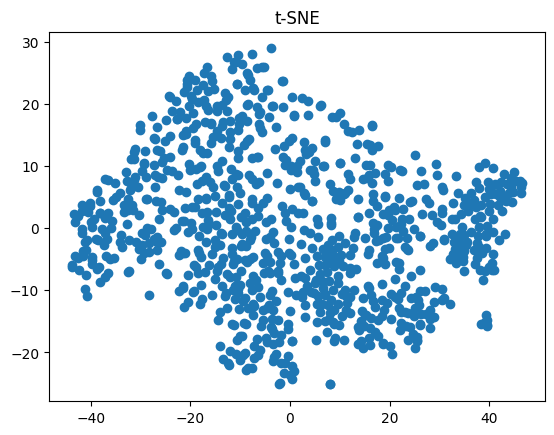

In [88]:
from sklearn.manifold import TSNE

def make_tsne(df, title):
    tsne = TSNE(n_components=2)
    reduced_data = tsne.fit_transform(df)
    reduced = pd.DataFrame(reduced_data)

    plt.scatter(reduced[0], reduced[1])
    plt.title(title)

    return reduced

gc_reduced = make_tsne(gc, 't-SNE').set_index(genres['name'])
gc_reduced

In [89]:
total_genres = pd.Series([genre for playlist_genres in genres['genres'] for genre in playlist_genres]).value_counts()
total_genres

indie rock           1563
chamber pop          1452
art pop              1348
indie pop            1312
singer-songwriter     965
                     ... 
french pop              1
big band                1
bubblegum pop           1
rock-and-roll           1
malaysian pop           1
Name: count, Length: 830, dtype: int64

,0,1
0,-14.793262,10.143254
1,12.651586,12.587631
2,2.561888,5.624395
3,-18.073774,-4.486916
4,-2.398709,15.206129
...,...,...
426,20.588652,-3.372772
427,14.046134,-7.501811
428,18.662037,-8.294888
429,1.232546,-2.970214


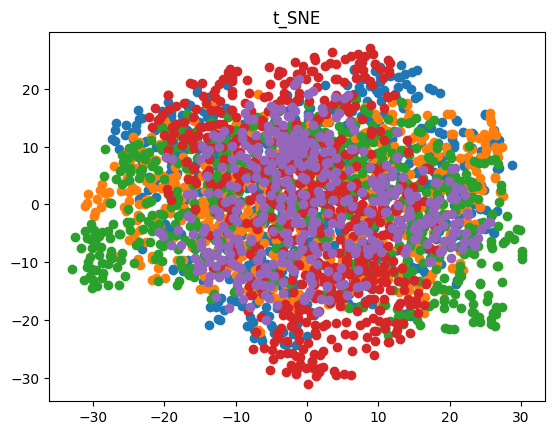

In [90]:
def genre_filter(col_name):
    return gc[gc[col_name] >= 1]

indie_rock = genre_filter('indie rock')
chamber_pop = genre_filter('chamber pop')
art_pop = genre_filter('art pop')
indie_pop = genre_filter('indie pop')
singer_songwriter = genre_filter('singer-songwriter')

make_tsne(indie_rock, "Indie Rock t-SNE")
make_tsne(chamber_pop, "Chamber Pop t-SNE")
make_tsne(art_pop, "")
make_tsne(indie_pop, "")
make_tsne(singer_songwriter, "t_SNE")

{'indie rock', 'art pop', 'indie pop', 'indie folk', 'folk', 'modern folk rock', 'new americana', 'alternative country', 'countrygaze'}


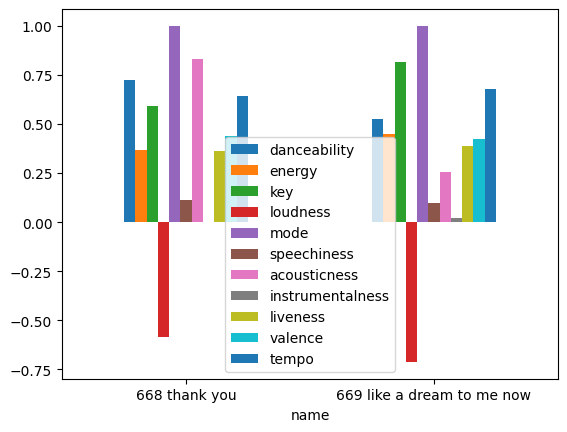

In [91]:
p1 = '668 thank you'
p2 = '669 like a dream to me now'

x = playlist_features.loc[[p1, p2]]

x_genres = genres.loc[genres['name'].isin([p1, p2])]['genres']
# print(x_genres)

p1_g = set(genres.loc[genres['name'].isin([p1])]['genres'].to_list()[0])
p2_g = set(genres.loc[genres['name'].isin([p2])]['genres'].to_list()[0])
print(p1_g.intersection(p2_g))

# print(set(genres.loc[genres['name'].isin(['767 summer sweat'])]['genres'].to_list()[0]))

ax = x.plot.bar(rot=0)

### PCA
- My scree plot indicated that 2 principal components accounted for .46 and .22 variance, whereas a 3rd component would account only for .1. Therefore I chose to use 2 principal components. These are also easier to visualize.
- I then plotted the loadings to sanity check my findings. It is sound to me that acousticness and mode affect their respective components heavily. Energy, valence, and danciness all measure the happiness/liveliness of a track, so it is logical that they are grouped together.

In [92]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2)

pc = pd.DataFrame(pca.fit_transform(playlist_features))
pc.set_index(gc.index, inplace=True)
pc.head()

,0,1
name,,
849 find out,-0.055200,0.052618
848 innocence,-0.563099,-0.254309
847 sick joke,0.462457,-0.090733
846 save me,-0.258846,0.127597
845 what did you expect,-0.428959,-0.817729


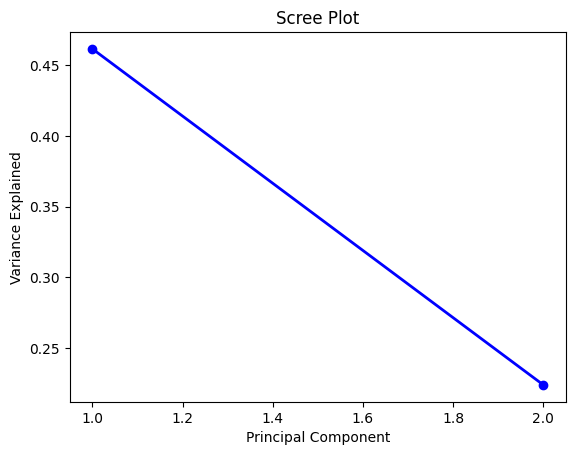

In [97]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [98]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = playlist_features.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
danceability,-0.142922,-0.045507
energy,-0.415771,0.165805
key,-0.068275,-0.178232
loudness,-0.319057,0.132912
mode,0.346516,0.905756
speechiness,-0.091282,-0.072726
acousticness,0.705497,-0.300706
instrumentalness,0.017765,-0.011404
liveness,-0.076406,0.032002


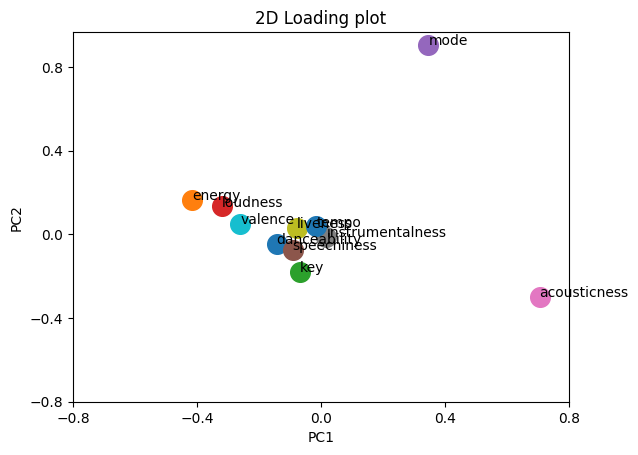

In [99]:
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot')
plt.show()

### Merging Genre and PC DataFrames

In [100]:
gc_norm = gc.copy()
for column in gc_norm.columns:
    gc_norm[column] = gc_norm[column] / gc_norm[column].abs().max()

gc_norm

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,neo-singer-songwriter,japanese chillhop,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,0.333333,0.0,0.00,0.0,0.125,0.0,0.000000,0.142857,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 remember,0.000000,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 remind me,0.111111,0.0,0.00,0.0,0.250,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
features = gc_norm.join(pc)
features.rename(columns={0: 'PC1', 1: 'PC2'}, inplace=True)
features = features.set_index(gc.index)
features

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop,PC1,PC2
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.055200,0.052618
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.563099,-0.254309
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462457,-0.090733
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258846,0.127597
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.428959,-0.817729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,0.333333,0.0,0.00,0.0,0.125,0.0,0.000000,0.142857,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125416,0.131133
00 remember,0.000000,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090718,0.023620
00 remind me,0.111111,0.0,0.00,0.0,0.250,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418437,-0.012456


In [110]:
features.columns

Index(['indie pop', 'modern indie folk', 'hyperpop', 'hypnagogic pop',
       'art pop', 'escape room', 'alternative r&b', 'pop', 'social media pop',
       'chillwave',
       ...
       'indie emo', 'electronic trap', 'progressive electro house',
       'classic girl group', 'dalarna indie', 'swedish garage rock', 'dmv rap',
       'malaysian pop', 'PC1', 'PC2'],
      dtype='object', length=832)

### Clustering
- I used k-medoids rather than k-means for this project because it is more resistant to outliers and actually finds an existing point as a centroid. This was useful to me because there would be no way to reverse engineer a centroid "playlist" of a k-means analysis.
- Silhouette score analysis indicated that 4 clusters gave the most distinct groupings.

In [113]:
from sklearn_extra.cluster import KMedoids as kmedoids
from sklearn.metrics import silhouette_score

In [114]:
X = features.set_index(genres['name'])
X

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop,PC1,PC2
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.055200,0.052618
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.563099,-0.254309
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462457,-0.090733
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258846,0.127597
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.428959,-0.817729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,0.333333,0.0,0.00,0.0,0.125,0.0,0.000000,0.142857,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125416,0.131133
00 remember,0.000000,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090718,0.023620
00 remind me,0.111111,0.0,0.00,0.0,0.250,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418437,-0.012456


In [115]:
s_scores = []

num_clusters = 1
low_score = -1
for i in range(2, 10):
    s = silhouette_score(X, kmedoids(n_clusters=i, random_state=42).fit_predict(X))
    s_scores.append(s)
    if s > low_score:
        low_score = s
        num_clusters = i

print(num_clusters)
print(s_scores)

2
[0.03146226068797136, -0.026298207909495337, -0.09218371947100933, -0.10512252400699676, -0.10203430727302923, -0.10118065340326429, -0.10148160750290805, -0.11527006121880416]


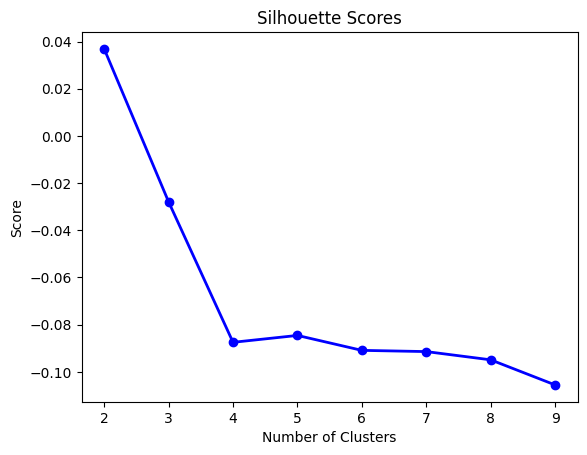

In [380]:
plt.plot(range(2, 10), s_scores, 'o-', linewidth=2, color='blue')
plt.xticks(range(2, 10))
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [116]:
km = kmedoids(n_clusters=4)
clusters = km.fit_predict(X)

clustered = X.copy().reset_index()
clustered['cluster'] = clusters

In [117]:
cluster0 = clustered.loc[clustered['cluster'] == 0]
cluster0

,name,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,...,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop,PC1,PC2,cluster
2,847 sick joke,0.111111,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462457,-0.090733,0
6,842 begin again,0.222222,0.0,0.0,0.0,0.750,0.2,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025555,0.105252,0
7,841 stay true,0.222222,0.0,0.0,0.0,0.250,0.0,0.142857,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.649658,-0.712944,0
11,837 no pretending,0.222222,0.0,0.0,0.5,0.250,0.2,0.428571,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214245,-0.510144,0
13,835 maybe tomorrow,0.000000,0.0,0.0,0.0,0.250,0.0,0.000000,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198422,0.011505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,00 think about it,0.333333,0.0,0.0,0.0,0.125,0.0,0.000000,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125416,0.131133,0
923,00 remember,0.000000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090718,0.023620,0
924,00 remind me,0.111111,0.0,0.0,0.0,0.250,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418437,-0.012456,0
925,00 forgetting,0.111111,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367797,-0.030212,0


### Visualization
- It seems like cluster 2 became a sort of catchall category, which I'd like to investigate further.
- I'd also like to create animated visualizations for this section, allowing users to access playlists by clicking on their points on the graph.

In [118]:
import seaborn as sns

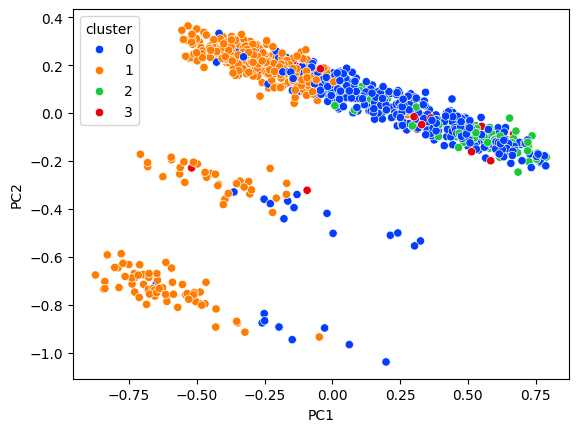

In [120]:
ax = sns.scatterplot(x='PC1', y='PC2', data=clustered, hue='cluster', palette='bright')
# ax = sns.scatterplot(x= km.cluster_centers_[:, 0], y = km.cluster_centers_[:, 1], hue=range(num_clusters), s=40, ec='black', legend=False, ax=ax)

plt.show()

### Recommendation System
- I checked the centers of the clusters and was surprised to find that the central points were not highly self-similar playlists, but rather ones that I would have trouble categorizing by genre.
- The final three functions access the pc1 and pc2 scores of a playlist by name, find its cluster, and calculate its euclidean distance to every other point in the cluster. closest() returns the nearest playlist in the cluster as a title string and a url for access.

In [121]:
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances

In [122]:
playlists = pd.read_csv('csv_files/playlists.csv')
playlists.head()

,name,track_ids,track_names,id,url,image,zipp
0,849 find out,"['6vca0aMELa1kc6mIs6w39c', '5jOCZRdWItMJKacbZo...","['toothache', 'Death Grip', 'The fish song', '...",5oKwX8pOYWofuTNMKx4okR,https://open.spotify.com/playlist/5oKwX8pOYWof...,https://mosaic.scdn.co/640/ab67616d00001e02bd8...,"[('6vca0aMELa1kc6mIs6w39c', 'toothache'), ('5j..."
1,848 innocence,"['6MzofobZt2dm0Kf1hTThFz', '5HwHdYpk3QiOUhsfWK...","['Diet Pepsi', 'Passionfruit', 'tears in the c...",5sMFgzDK1HTjG2bxIyi9jI,https://open.spotify.com/playlist/5sMFgzDK1HTj...,https://mosaic.scdn.co/640/ab67616d00001e024e5...,"[('6MzofobZt2dm0Kf1hTThFz', 'Diet Pepsi'), ('5..."
2,847 sick joke,"['4ztA5OPlOzUvbE0Cgh2gV9', '505HhtdgN8lynQcJQC...","['something will give', 'Ever Seen', 'Birdwatc...",3oldJCV4dggIdDCB8aFlFc,https://open.spotify.com/playlist/3oldJCV4dggI...,https://mosaic.scdn.co/640/ab67616d00001e0254c...,"[('4ztA5OPlOzUvbE0Cgh2gV9', 'something will gi..."
3,846 save me,"['3vlAqZvq7IYKOoOKwHGAxd', '0LXxEKF7GjUbGYCeBO...","['double dog', 'Weirdwordsworms', 'Infinite Lo...",3g39V9zZwlt9ZYn7JKTOCj,https://open.spotify.com/playlist/3g39V9zZwlt9...,https://image-cdn-ak.spotifycdn.com/image/ab67...,"[('3vlAqZvq7IYKOoOKwHGAxd', 'double dog'), ('0..."
4,845 what did you expect,"['0rxQTgJzd0HCUk4QUxSkjK', '74OfKhcmck9KUHBPmC...","['Even If It Hurts (feat. Blood Orange)', 'Dri...",0KgwFInw8xWYmtDQWayf2p,https://open.spotify.com/playlist/0KgwFInw8xWY...,https://image-cdn-ak.spotifycdn.com/image/ab67...,"[('0rxQTgJzd0HCUk4QUxSkjK', 'Even If It Hurts ..."


In [123]:
def get_centers(df, centers):
    m = distance_matrix(centers, np.asmatrix(df.to_numpy()))
    return [df.index[i] for i in np.argmin(m, axis=1)]

centers = np.array(km.cluster_centers_)
get_centers(X, centers)

['847 sick joke',
 '849 find out',
 '739 this always happens',
 '832 might as well']

In [129]:
def playlist_to_coords(playlist):
    pc1 = clustered.loc[clustered["name"] == playlist]['PC1'].item()
    pc2 = clustered.loc[clustered["name"] == playlist]['PC2'].item()
    coords = np.array([pc1, pc2])
    return coords

def get_cluster(playlist):
    n = clustered[clustered['name'] == playlist]['cluster'].item()
    return clustered[clustered['cluster'] == n]

def closest(playlist):
    cluster_points = get_cluster(playlist)[['PC1', 'PC2']]
    distances = euclidean_distances([playlist_to_coords(playlist)], cluster_points)[0]
    closest_index = np.argmin(distances)
    closest_name = clustered.iloc[closest_index]['name']
    closest_link = playlists.loc[np.where(playlists['name'] == closest_name)]['url'].item()
    return closest_name, closest_link 

In [130]:
closest('00 alright')

('473 losing sleep',
 'https://open.spotify.com/playlist/4whh6813413D9BEFOMjaQ5')